## 1

In [1]:
import torch

print(torch.__version__)
print(torch.cuda.is_available())

2.3.1+cu118
True


In [2]:
x = torch.rand(5, 3)
print(x)

tensor([[0.3128, 0.1644, 0.3412],
        [0.8908, 0.0612, 0.5408],
        [0.1904, 0.2122, 0.9053],
        [0.1053, 0.8854, 0.1761],
        [0.8892, 0.1977, 0.9128]])


## 2

In [8]:
# 创建一个需要梯度的张量
tensor_requires_grad = torch.tensor([1.0], requires_grad=True)

# 进行一些操作
tensor_result = tensor_requires_grad * 2

# 计算梯度
tensor_result.backward()
print(tensor_requires_grad.grad)  # 输出梯度

tensor([2.])


**requires_grad=True**：

表示 PyTorch 会跟踪该张量的操作，并在反向传播时计算其梯度。这个梯度通常用于优化模型参数

y=2x，导数是2，所以是tensor([2.])

当 requires_grad=True 时，PyTorch 会跟踪张量的所有操作并构建计算图，以便在反向传播时计算梯度。

这会增加额外的计算和内存开销。如果不需要计算梯度，将 requires_grad 设置为 False 可以避免这些开销

## 3

In [3]:
import torch.nn as nn
import torch.optim as optim

**torch.nn**提供了构建神经网络所需的各种工具和组件

全连接层：nn.Linear、卷积层：nn.Conv2d、循环神经网络层：nn.RNN, nn.LSTM, nn.GRU

归一化层：nn.BatchNorm2d、池化层：nn.MaxPool2d、Dropout层：nn.Dropout

激活函数：nn.ReLU, nn.Sigmoid, nn.Tanh, nn.Softmax、损失函数：nn.MSELoss()

容器：nn.Sequential：将多个层按顺序组合成一个模型

nn.Module：所有神经网络模块的基类，自定义模型时需要继承它

**torch.optim**提供了各种优化算法，用于更新模型参数以最小化损失函数

优化器（Optimizers）、学习率调度器（Learning Rate Schedulers）

In [4]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1=nn.Linear(2,2)
        self.fc2=nn.Linear(2,1)

    def forward(self,x):
        x=torch.relu(self.fc1(x))
        x=self.fc2(x)
        return x

model = SimpleNN()
print(model)

SimpleNN(
  (fc1): Linear(in_features=2, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=1, bias=True)
)


`super(SimpleNN, self).__init__()`的作用是调用父类 nn.Module 的构造函数，确保 SimpleNN 类正确初始化

在 Python 3 中，`super()` 可以省略参数，简化为：`super().__init__()`

In [34]:
x=torch.randn(1,2)
print(x)
output=model(x)
print(output)

tensor([[ 0.1889, -0.2074]])
tensor([[0.3014]], grad_fn=<AddmmBackward0>)


In [ ]:
criterion=nn.MSELoss()
target=torch.randn(1,1)
print(target)
loss=criterion(output,target)
print(loss)

tensor([[1.2167]])
tensor(0.8378, grad_fn=<MseLossBackward0>)


In [36]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.3859,  0.0598],
        [ 0.2440,  0.3363]], requires_grad=True), Parameter containing:
tensor([0.6713, 0.1676], requires_grad=True), Parameter containing:
tensor([[0.1427, 0.1598]], requires_grad=True), Parameter containing:
tensor([0.1947], requires_grad=True)]


这里输出了 4 个 Tensor，分别对应：

fc1.weight

fc1.bias

fc2.weight

fc2.bias

In [38]:
for name, param in model.named_parameters():
    print(f"Name: {name}, Shape: {param.shape}, Value: {param}")

Name: fc1.weight, Shape: torch.Size([2, 2]), Value: Parameter containing:
tensor([[-0.3859,  0.0598],
        [ 0.2440,  0.3363]], requires_grad=True)
Name: fc1.bias, Shape: torch.Size([2]), Value: Parameter containing:
tensor([0.6713, 0.1676], requires_grad=True)
Name: fc2.weight, Shape: torch.Size([1, 2]), Value: Parameter containing:
tensor([[0.1427, 0.1598]], requires_grad=True)
Name: fc2.bias, Shape: torch.Size([1]), Value: Parameter containing:
tensor([0.1947], requires_grad=True)


In [39]:
for name, param in model.state_dict().items():
    print(f"Name: {name}, Shape: {param.shape}, Value: {param}")

Name: fc1.weight, Shape: torch.Size([2, 2]), Value: tensor([[-0.3859,  0.0598],
        [ 0.2440,  0.3363]])
Name: fc1.bias, Shape: torch.Size([2]), Value: tensor([0.6713, 0.1676])
Name: fc2.weight, Shape: torch.Size([1, 2]), Value: tensor([[0.1427, 0.1598]])
Name: fc2.bias, Shape: torch.Size([1]), Value: tensor([0.1947])


In [ ]:
# 定义优化器（使用 Adam 优化器）
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练步骤
optimizer.zero_grad()  # 清空梯度
loss.backward()  # 反向传播
optimizer.step()  # 更新参数

## 4

1、import torch nn optim

2、定义模型类：init（继承、结构）、前向传播forward

3、创建模型实例

4、定义损失函数和优化器

5、加载训练数据

6、训练循环：清空梯度、前向传播、计算损失、反向传播、更新参数

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim

# 1. 定义一个简单的神经网络模型
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 2)  # 输入层到隐藏层
        self.fc2 = nn.Linear(2, 1)  # 隐藏层到输出层

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # ReLU 激活函数
        x = self.fc2(x)
        return x

# 2. 创建模型实例
model = SimpleNN()

# 3. 定义损失函数和优化器
criterion = nn.MSELoss()  # 均方误差损失函数
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam 优化器

# 4. 假设我们有训练数据 X 和 Y
X = torch.randn(10, 2)  # 10 个样本，2 个特征
Y = torch.randn(10, 1)  # 10 个目标值

# 5. 训练循环
for epoch in range(100):  # 训练 100 轮
    optimizer.zero_grad()  # 清空之前的梯度
    output = model(X)  # 前向传播
    loss = criterion(output, Y)  # 计算损失
    loss.backward()  # 反向传播
    optimizer.step()  # 更新参数

    # 每 10 轮输出一次损失
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/100], Loss: {loss.item():.4f}")

Epoch [10/100], Loss: 1.3881
Epoch [20/100], Loss: 1.3354
Epoch [30/100], Loss: 1.2853
Epoch [40/100], Loss: 1.2378
Epoch [50/100], Loss: 1.1929
Epoch [60/100], Loss: 1.1505
Epoch [70/100], Loss: 1.1107
Epoch [80/100], Loss: 1.0734
Epoch [90/100], Loss: 1.0384
Epoch [100/100], Loss: 1.0057


## 5

In [60]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 将模型移动到设备
model.to(device)

# 将数据移动到设备
X = X.to(device)
Y = Y.to(device)

## 6

In [4]:
# 导入PyTorch库
import torch
import torch.nn as nn

# 定义输入层大小、隐藏层大小、输出层大小和批量大小
n_in, n_h, n_out, batch_size = 10, 5, 1, 10

# 创建虚拟输入数据和目标数据
x = torch.randn(batch_size, n_in)  # 随机生成输入数据 10*10
y = torch.tensor(
    [[1.0], [0.0], [0.0], [1.0], [1.0], [1.0], [0.0], [0.0], [1.0], [1.0]]
)  # 目标输出数据 10*1

# 创建顺序模型，包含线性层、ReLU激活函数和Sigmoid激活函数
model = nn.Sequential(
    nn.Linear(n_in, n_h),  # 输入层到隐藏层的线性变换 10→5
    nn.ReLU(),  # 隐藏层的ReLU激活函数
    nn.Linear(n_h, n_out),  # 隐藏层到输出层的线性变换 5→1
    nn.Sigmoid(),  # 输出层的Sigmoid激活函数
)

# 定义均方误差损失函数和随机梯度下降优化器
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # 学习率为0.01

# 用于存储每轮的损失值
losses = []

# 执行梯度下降算法进行模型训练
for epoch in range(100):
    y_pred = model(x)  # 前向传播，计算预测值
    loss = criterion(y_pred, y)  # 计算损失
    losses.append(loss.item())  # 记录损失值
    if epoch%10 == 0:
        print("epoch: ", epoch, "loss: ", loss.item())  # 打印损失值

    optimizer.zero_grad()  # 清零梯度
    loss.backward()  # 反向传播，计算梯度
    optimizer.step()  # 更新模型参数

epoch:  0 loss:  0.23922598361968994
epoch:  10 loss:  0.23880299925804138
epoch:  20 loss:  0.2383890151977539
epoch:  30 loss:  0.23800602555274963
epoch:  40 loss:  0.2376222163438797
epoch:  50 loss:  0.23723740875720978
epoch:  60 loss:  0.23685124516487122
epoch:  70 loss:  0.2364635467529297
epoch:  80 loss:  0.2360740602016449
epoch:  90 loss:  0.2356824427843094


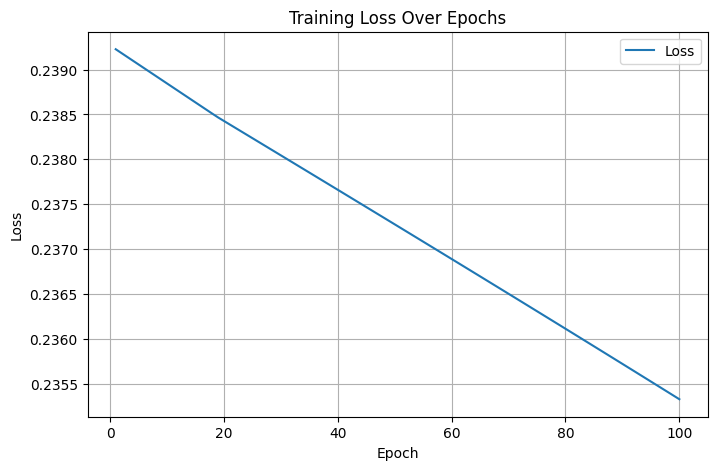

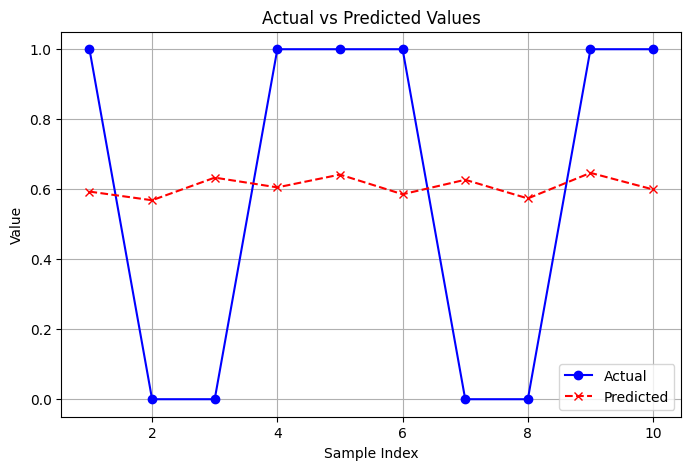

In [8]:
import matplotlib.pyplot as plt

# 可视化损失变化曲线
plt.figure(figsize=(8, 5))
plt.plot(range(1, 101), losses, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.grid()
plt.show()

# 可视化预测结果与实际目标值对比
y_pred_final = model(x).detach().numpy()  # 最终预测值
y_actual = y.numpy()  # 实际值

plt.figure(figsize=(8, 5))
plt.plot(range(1, batch_size + 1), y_actual, "o-", label="Actual", color="blue")
plt.plot(range(1, batch_size + 1), y_pred_final, "x--", label="Predicted", color="red")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid()
plt.show()

## 7

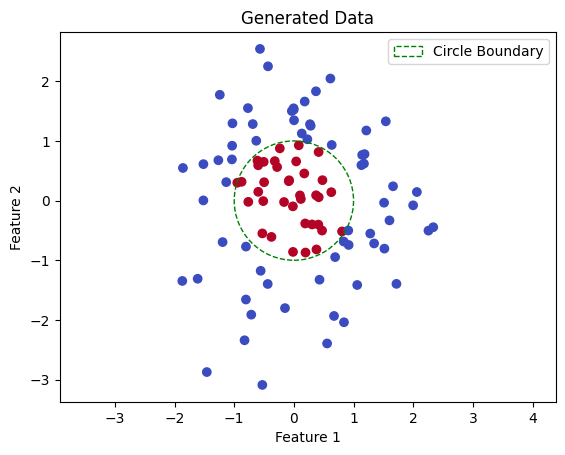

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 生成一些随机数据
n_samples = 100
data = torch.randn(n_samples, 2)  # 生成 100 个二维数据点
labels = (
    (data[:, 0] ** 2 + data[:, 1] ** 2 < 1).float().unsqueeze(1)
)  # 点在圆内为1，圆外为0

# 可视化数据
plt.scatter(data[:, 0], data[:, 1], c=labels.squeeze(), cmap="coolwarm")
plt.title("Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# 绘制圆的边界
circle = plt.Circle(
    (0, 0), 1, color="green", fill=False, linestyle="--", label="Circle Boundary"
)
plt.gca().add_patch(circle)

# 设置图形比例和显示
plt.axis("equal")  # 确保 x 和 y 轴比例相同
plt.legend()
plt.show()

In [27]:
# 定义前馈神经网络
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # 定义神经网络的层
        self.fc1 = nn.Linear(2, 4)  # 输入层有 2 个特征，隐藏层有 4 个神经元
        self.fc2 = nn.Linear(4, 1)  # 隐藏层输出到 1 个神经元（用于二分类）
        self.sigmoid = nn.Sigmoid()  # 二分类激活函数

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # 使用 ReLU 激活函数
        x = self.sigmoid(self.fc2(x))  # 输出层使用 Sigmoid 激活函数
        return x


# 实例化模型
model = SimpleNN()

# 定义损失函数和优化器
criterion = nn.BCELoss()  # 二元交叉熵损失
optimizer = optim.SGD(model.parameters(), lr=0.1)  # 使用随机梯度下降优化器

In [40]:
# 训练
epochs = 3000
for epoch in range(epochs):
    # 前向传播
    outputs = model(data)
    loss = criterion(outputs, labels)

    # 反向传播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 每 10 轮打印一次损失
    if (epoch + 1) % 500 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [500/3000], Loss: 0.0300
Epoch [1000/3000], Loss: 0.0292
Epoch [1500/3000], Loss: 0.0284
Epoch [2000/3000], Loss: 0.0277
Epoch [2500/3000], Loss: 0.0270
Epoch [3000/3000], Loss: 0.0264


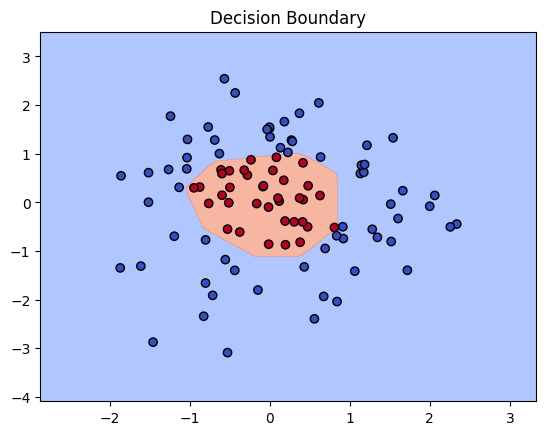

In [41]:
# 可视化决策边界
def plot_decision_boundary(model, data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = torch.meshgrid(
        torch.arange(x_min, x_max, 0.1), torch.arange(y_min, y_max, 0.1), indexing="ij"
    )
    grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)
    predictions = model(grid).detach().numpy().reshape(xx.shape)
    plt.contourf(xx, yy, predictions, levels=[0, 0.5, 1], cmap="coolwarm", alpha=0.7)
    plt.scatter(
        data[:, 0], data[:, 1], c=labels.squeeze(), cmap="coolwarm", edgecolors="k"
    )
    plt.title("Decision Boundary")
    plt.show()


plot_decision_boundary(model, data)

## 8

In [43]:
import torch
from torch.utils.data import Dataset

# 自定义数据集类
class MyDataset(Dataset):
    def __init__(self, X_data, Y_data):
        """
        初始化数据集，X_data 和 Y_data 是两个列表或数组
        X_data: 输入特征
        Y_data: 目标标签
        """
        self.X_data = X_data
        self.Y_data = Y_data

    def __len__(self):
        """返回数据集的大小"""
        return len(self.X_data)

    def __getitem__(self, idx):
        """返回指定索引的数据"""
        x = torch.tensor(self.X_data[idx], dtype=torch.float32)  # 转换为 Tensor
        y = torch.tensor(self.Y_data[idx], dtype=torch.float32)
        return x, y


# 示例数据
X_data = [[1, 2], [3, 4], [5, 6], [7, 8]]  # 输入特征
Y_data = [1, 0, 1, 0]  # 目标标签

# 创建数据集实例
dataset = MyDataset(X_data, Y_data)
print(dataset)

torch.utils.data.Dataset是一个抽象类，它只提供了接口，并没有实现具体功能

`__len__` 和 `__getitem__` 都需要你自己定义

## 9

In [44]:
from torch.utils.data import DataLoader

# 创建 DataLoader 实例，batch_size 设置每次加载的样本数量
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# 打印加载的数据
for epoch in range(1):
    for batch_idx, (inputs, labels) in enumerate(dataloader):
        print(f"Batch {batch_idx + 1}:")
        print(f"Inputs: {inputs}")
        print(f"Labels: {labels}")

Batch 1:
Inputs: tensor([[7., 8.],
        [5., 6.]])
Labels: tensor([0., 1.])
Batch 2:
Inputs: tensor([[1., 2.],
        [3., 4.]])
Labels: tensor([1., 0.])


## 10

In [ ]:
import torchvision.transforms as transforms
from PIL import Image

# 定义数据预处理的流水线
transform = transforms.Compose(
    [
        transforms.Resize((128, 128)),  # 将图像调整为 128x128
        transforms.ToTensor(),  # 将图像转换为张量
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
        ),  # 标准化
    ]
)

# 加载图像
image = Image.open("image.jpg")

# 应用预处理
image_tensor = transform(image)
print(image_tensor.shape)  # 输出张量的形状

transforms.ToTensor() 会将图像的通道顺序从 (H, W, C)（高度、宽度、通道）调整为 (C, H, W)（通道、高度、宽度）

 通常放在预处理流水线的最前面